In [7]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from IPython.display import Image
from ipywidgets import interact, fixed, ToggleButtons, IntSlider, FloatSlider
%matplotlib inline

# Define model (adjusted from IN's)

In [39]:
def model_afgeleiden(variables, t, beta, gamma):

    S = variables[0]
    I = variables[1]
    R = variables[2]
    
    S_new = -beta*I*S 
    I_new = beta*I*S - gamma*I
    R_new = gamma*I
    return [S_new, I_new, R_new]

def SIRmodel(tijdstappen, S_0, I_0, R_0, beta, gamma, returnDataFrame=True, plotFig=True):
    """
    Modelimplementatie van het populatiemodel 
    
    Parameters
    -----------
    tijdstappen : np.array
        array van tijdstappen          
    """
    modeloutput = odeint(model_afgeleiden, [S_0, I_0, R_0], tijdstappen, args=(beta, gamma));
    modeloutput = pd.DataFrame(modeloutput, columns=['S','I','R'], index=tijdstappen)
    
    modeloutput.index = pd.date_range(start='11/1/2019', periods=len(tijdstappen))
    
    if plotFig:
        modeloutput.plot()
    if returnDataFrame:
        return modeloutput 

# Load total infected from JHU

In [114]:
df_confd = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

In [115]:
COVID19_totalConf = pd.DataFrame(df_confd.T[4:].sum(axis=1), columns=['TotalConfirmed'])

In [116]:
COVID19_totalConf.index = pd.to_datetime(COVID19_totalConf.index)

# Case of 5M infected people

(0, 600000)

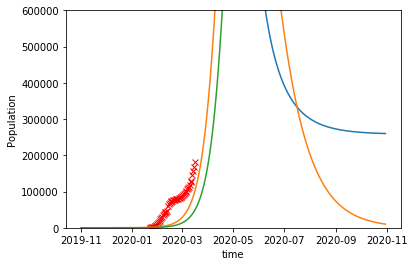

In [117]:
model = SIRmodel(np.arange(0., 365, 1), 5000000, 1, 0,
                   0.000000025, # beta how often a susceptible-infected contact results in a new infection.
                   0.04, # gamma rate an infected recovers and moves into the resistant phase
                   returnDataFrame=True,
                plotFig=False)

fig, axes = plt.subplots(1,1)
axes.set_xlabel('time')
axes.set_ylabel('Population')

axes.plot(COVID19_totalConf, 'rx')
axes.plot(model) ;
axes.set_ylim([0, 600000])

# Case of 500k infected people

(0, 600000)

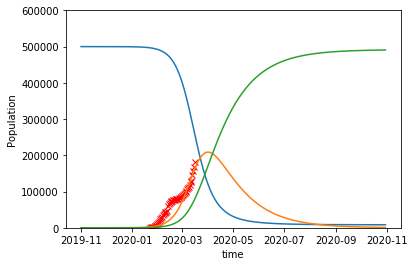

In [118]:
model = SIRmodel(np.arange(0., 365, 1), 500000, 1, 0,
                   0.00000025, # beta how often a susceptible-infected contact results in a new infection.
                   0.03, # gamma rate an infected recovers and moves into the resistant phase
                   returnDataFrame=True,
                plotFig=False)

fig, axes = plt.subplots(1,1)
axes.set_xlabel('time')
axes.set_ylabel('Population')

axes.plot(COVID19_totalConf, 'rx')
axes.plot(model) ;
axes.set_ylim([0, 600000])

# Playground

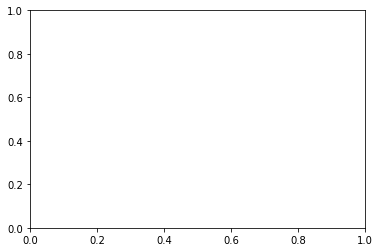

interactive(children=(FloatSlider(value=0.0001, continuous_update=False, description='beta', max=0.0005, min=1…

TypeError: float() argument must be a string or a number, not 'function'

In [98]:
fig, axes = plt.subplots(1,1)
# axes.set_xlabel('time')
# axes.set_ylabel('Population')



axes.plot(interact(SIRmodel, tijdstappen=fixed(np.arange(0., 1000, 1)), S_0=fixed(50000), I_0=fixed(1), R_0=fixed(0),
                   beta=FloatSlider(value=1e-4, min=1e-6, max=5e-4, step=1e-6,
                                    continuous_update=False, readout_format='.2e'),
                   gamma=FloatSlider(value=0.0001, min=0, max=0.01, step=0.0001,
                                     continuous_update=False, readout_format='.2e'),
                   returnDataFrame=fixed(False),
                   ax=axes))
axes.plot(COVID19_totalConf, 'rx')